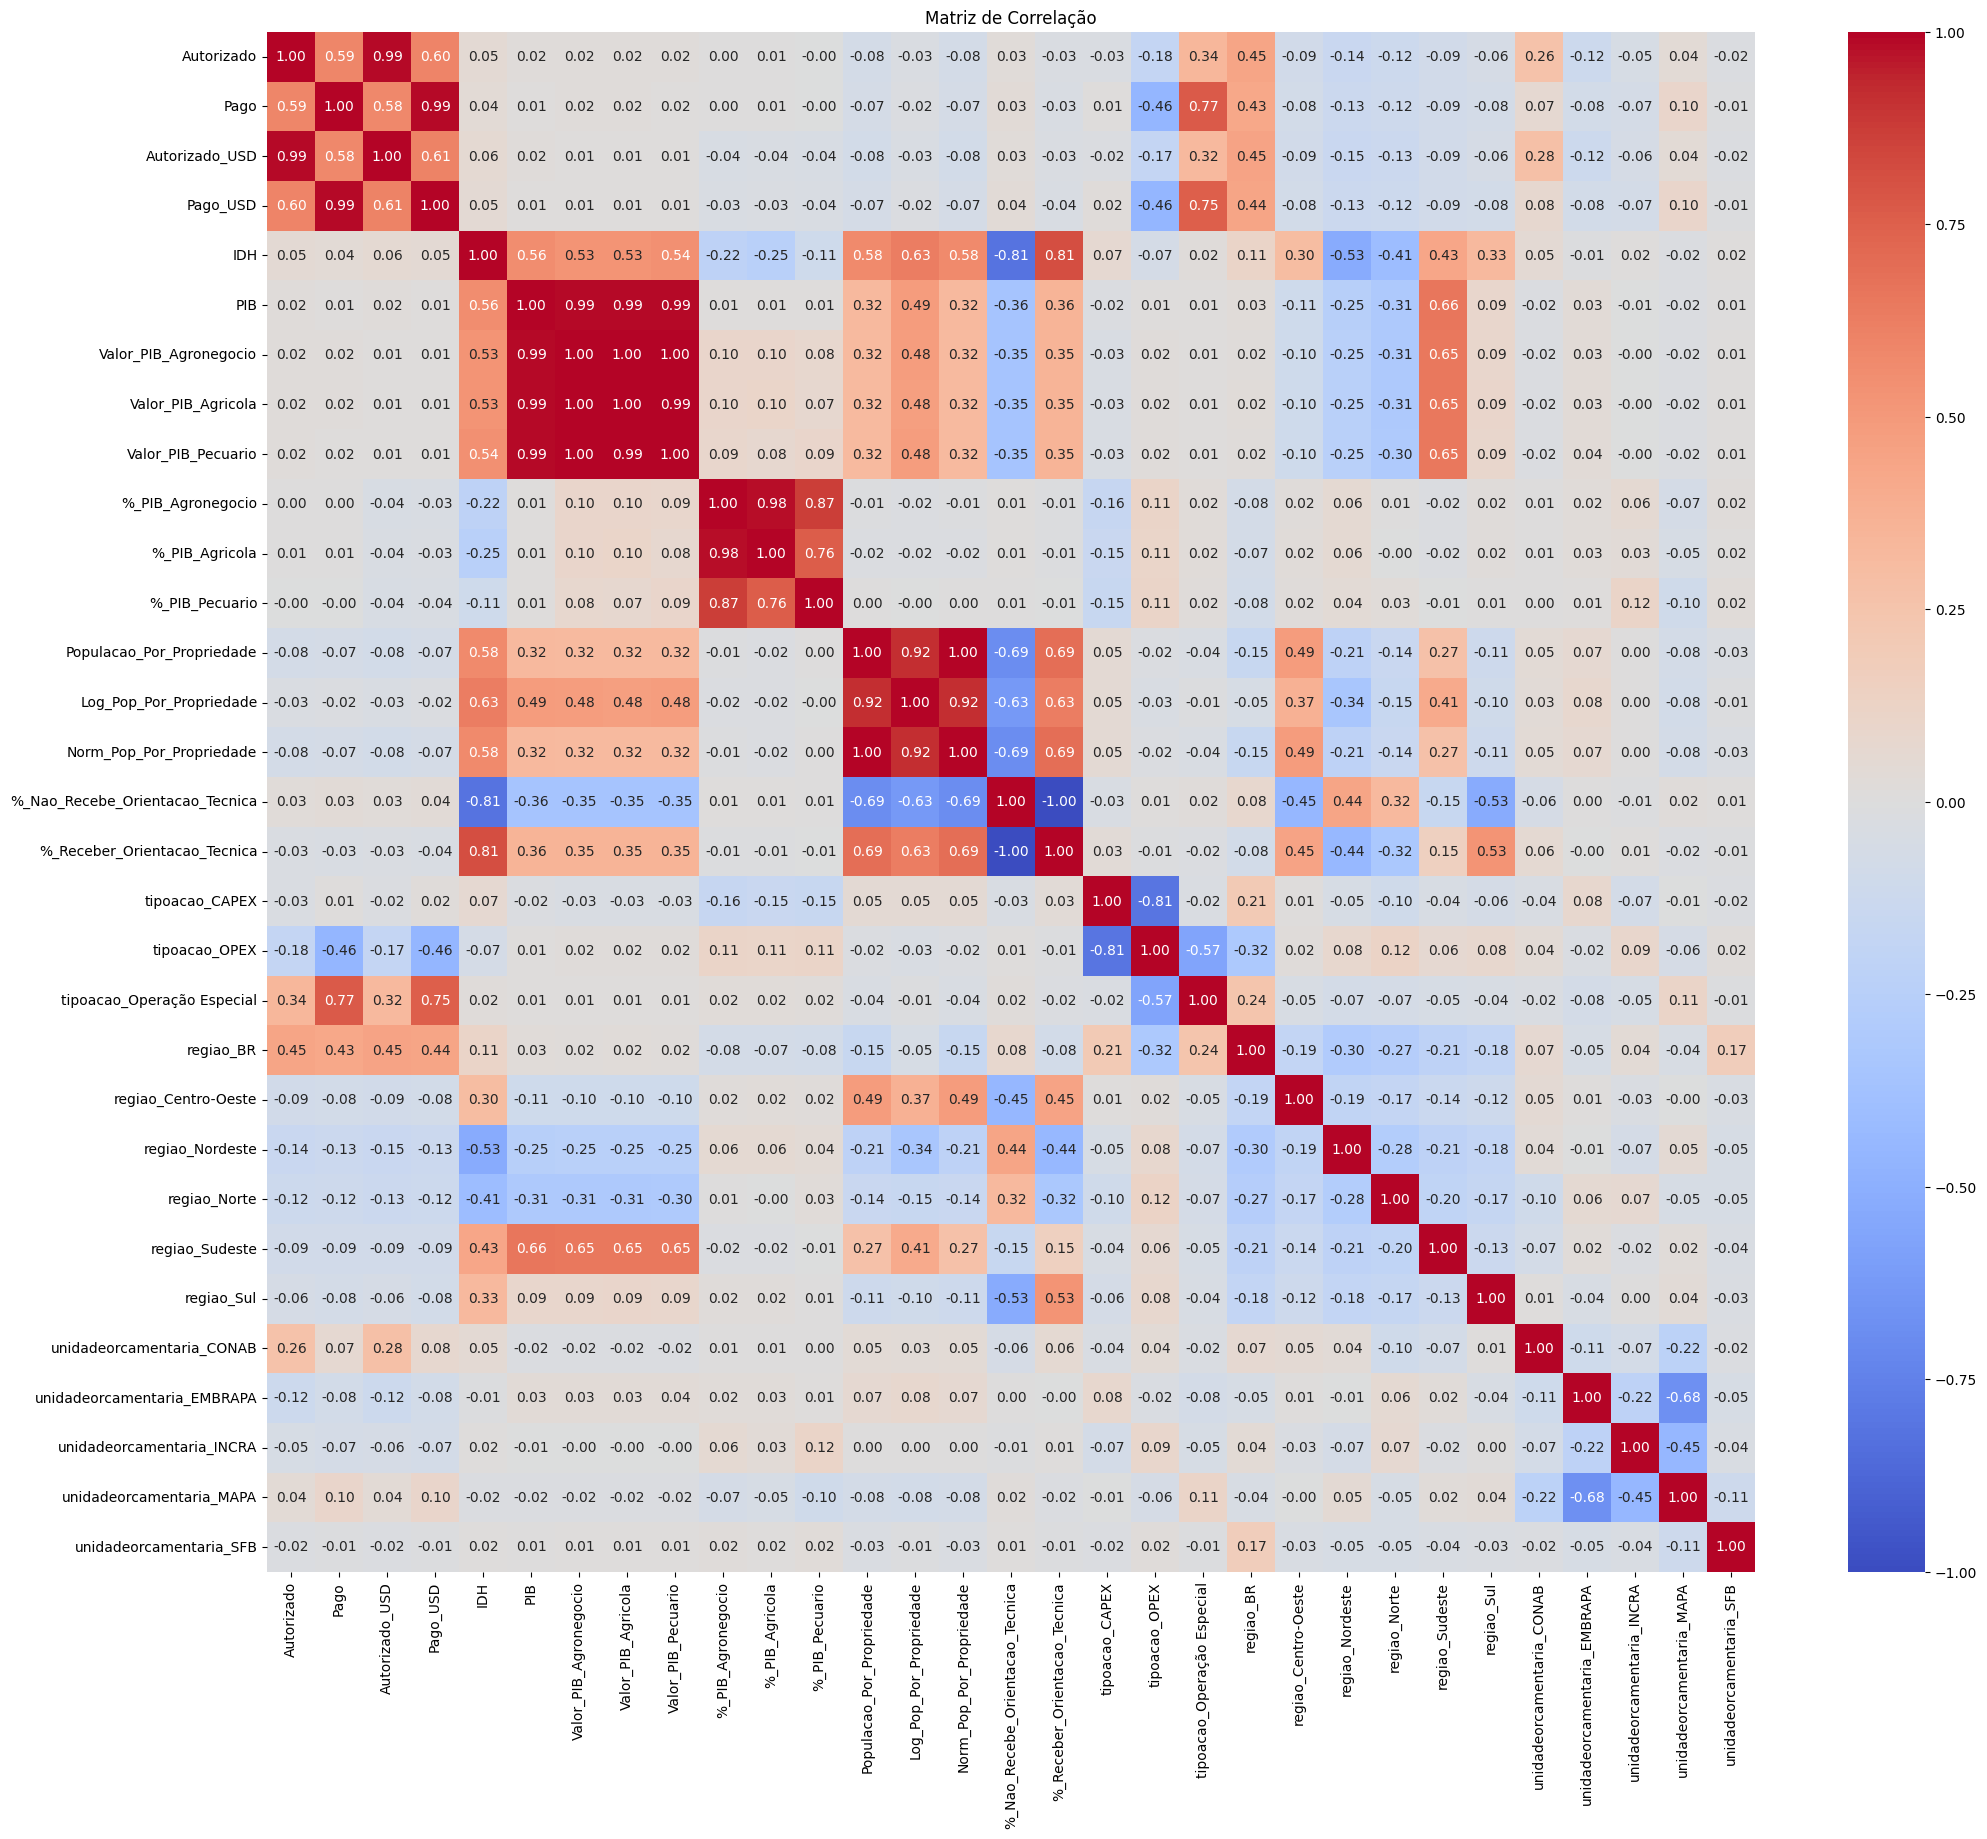

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

# Carregar o arquivo CSV
file_path = 'C:\\DSA_USP\\DATA_SOURCE\\ANÁLISE FINAL V05.csv'
df = pd.read_csv(file_path, sep=';', decimal=',')

# One-hot encoding para os atributos 'tipoacao' e 'regiao'
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df[['tipoacao', 'regiao', 'unidadeorcamentaria']])

# Criar nomes de colunas personalizados
encoded_columns = encoder.get_feature_names_out(['tipoacao', 'regiao', 'unidadeorcamentaria'])

# Criar DataFrame codificado com os nomes de colunas personalizados
df_encoded = pd.DataFrame(encoded_data, columns=encoded_columns, index=df.index)

# Concatenar as colunas codificadas com o DataFrame original
df = pd.concat([df, df_encoded], axis=1)

# Remover as colunas originais 'tipoacao' e 'regiao'
df = df.drop(['tipoacao', 'regiao'], axis=1)

# Criar matriz de correlação com os atributos numéricos
numeric_cols = [col for col in df.columns if df[col].dtype in [int, float]]
correlation_matrix = df[numeric_cols].corr()

# Salva a matriz de correlação em um arquivo CSV
correlation_matrix.to_csv('C:\\DSA_USP\\DATA_SOURCE\\matriz_correlacao.csv', sep='|', index=True)

# Plota a matriz de correlação
plt.figure(figsize=(24, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()


### Análise de Multicolinearidade
A multicolinearidade ocorre quando duas ou mais variáveis independentes em um modelo de regressão estão altamente correlacionadas. Para detectar isso, observamos os valores absolutos da matriz de correlação. Geralmente, valores acima de 0.7 indicam uma alta correlação, sugerindo multicolinearidade.

### Vamos observar algumas das correlações mais altas da matriz fornecida:

Autorizado e Autorizado_USD: 0.987836
Pago e Pago_USD: 0.989949
Autorizado e Pago: 0.593687
Autorizado_USD e Pago_USD: 0.606131
Pago e tipoacao_Operação Especial: 0.766798
Seleção de Features para XGBoost
Para selecionar as melhores features para maximizar a performance do XGBoost, consideramos:

Relevância: Features que estão diretamente correlacionadas com o alvo, no caso, o PIB.
Multicolinearidade: Evitar features altamente correlacionadas entre si, para não introduzir redundância no modelo.
Variedade: Incluir uma variedade de tipos de dados que possam capturar diferentes aspectos do problema.

### Features Selecionadas:

Autorizado: Como é altamente correlacionada com Autorizado_USD, mas mantemos apenas uma para evitar multicolinearidade.

Pago: Também altamente correlacionada com Pago_USD, mas escolhemos uma pelo mesmo motivo.

IDH: Embora não altamente correlacionada, é uma variável importante para o desenvolvimento econômico.

Valor_PIB_Agronegocio, Valor_PIB_Agricola, Valor_PIB_Pecuario: Importantes para entender diferentes setores do PIB.

%_PIB_Agronegocio, %_PIB_Agricola, %_PIB_Pecuario: Percentuais também ajudam a entender a composição do PIB.

Populacao_Por_Propriedade: Pode fornecer insights sobre a distribuição da população.

%_Nao_Recebe_Orientacao_Tecnica e %_Receber_Orientacao_Tecnica: Representam o acesso a tecnologias e métodos modernos.

tipoacao_OPEX: Reflete a operação especial, importante para as finanças.

Variáveis dummy regionais para capturar variações regionais: 
regiao_Centro-Oeste, 
regiao_Nordeste, 
regiao_Norte, 
regiao_Sudeste, 
regiao_Sul.

### Justificativa
Evitamos Multicolinearidade: Selecionando apenas uma entre as variáveis altamente correlacionadas.
Variabilidade dos Dados: Incluímos variáveis que cobrem diferentes aspectos econômicos, regionais e técnicos.
Relevância para PIB: Selecionamos variáveis com potencial de impacto direto no PIB, considerando diferentes setores econômicos e indicadores de desenvolvimento.
Essas features fornecem uma base robusta para um modelo XGBoost, permitindo capturar diversas nuances do que influencia o PIB.